In [2]:
import json
import re
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("filtered_cuad_normalized.csv")

In [4]:
df.head(3)

,id,doc_id,category_name,answer_text
0,PAIR_00000001,DOC_0001,Document Name,distributor agreement
1,PAIR_00000002,DOC_0001,Parties,distributor
2,PAIR_00000003,DOC_0001,Parties,electric city corp.


In [5]:
duplicates_df = df[df['answer_text'].duplicated(keep=False)]

In [6]:
duplicates_df.shape

(3721, 4)

In [7]:
duplicates_df.head()

,id,doc_id,category_name,answer_text
0,PAIR_00000001,DOC_0001,Document Name,distributor agreement
1,PAIR_00000002,DOC_0001,Parties,distributor
4,PAIR_00000005,DOC_0001,Parties,company
7,PAIR_00000008,DOC_0001,Effective Date,the term of this agreement shall be ten (10) y...
9,PAIR_00000010,DOC_0001,Expiration Date,the term of this agreement shall be ten (10) y...


In [9]:
unique_values = df['category_name'].unique()
print(unique_values)

['Document Name' 'Parties' 'Agreement Date' 'Effective Date'
 'Expiration Date' 'Renewal Term' 'Governing Law' 'Exclusivity'
 'No-Solicit Of Customers' 'No-Solicit Of Employees' 'Rofr/Rofo/Rofn'
 'Anti-Assignment' 'Price Restrictions' 'Minimum Commitment'
 'License Grant' 'Post-Termination Services' 'Warranty Duration'
 'Insurance' 'Covenant Not To Sue' 'Change Of Control' 'Audit Rights'
 'Uncapped Liability' 'Cap On Liability'
 'Notice Period To Terminate Renewal' 'Termination For Convenience'
 'Non-Compete' 'Competitive Restriction Exception' 'Volume Restriction'
 'Ip Ownership Assignment' 'Irrevocable Or Perpetual License'
 'Revenue/Profit Sharing' 'Non-Transferable License'
 'Affiliate License-Licensee' 'Liquidated Damages' 'Joint Ip Ownership'
 'Third Party Beneficiary' 'Most Favored Nation'
 'Unlimited/All-You-Can-Eat-License' 'Source Code Escrow'
 'Affiliate License-Licensor' 'Non-Disparagement']


In [10]:
unique_values.size

41

In [8]:
clause_counts = df['answer_text'].value_counts()
duplicates = clause_counts[clause_counts > 1]
print(duplicates)

answer_text
company                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       66
strategic alliance agreement                                                                                                                                                                                                                                                                                                                                                               

In [9]:
duplicates.size

1471

In [10]:
df_duplicates = df[df.duplicated(subset=['answer_text'])] 
print(df_duplicates)

                  id    doc_id              category_name  \
9      PAIR_00000010  DOC_0001            Expiration Date   
30     PAIR_00000042  DOC_0001              License Grant   
47     PAIR_00000070  DOC_0002                    Parties   
68     PAIR_00000116  DOC_0002           Cap On Liability   
70     PAIR_00000118  DOC_0002           Cap On Liability   
...              ...       ...                        ...   
13778  PAIR_00027958  DOC_0509  Post-Termination Services   
13781  PAIR_00027961  DOC_0509               Audit Rights   
13793  PAIR_00027976  DOC_0509                  Insurance   
13799  PAIR_00027983  DOC_0510              Document Name   
13802  PAIR_00027986  DOC_0510                    Parties   

                                             answer_text  
9      the term of this agreement shall be ten (10) y...  
30     company hereby appoints distributor as company...  
47                                           distributor  
68     subject to clauses 9.1 a

In [11]:
df_duplicates.to_csv('duplicates.csv')

In [12]:
category_counts = df['category_name'].value_counts()
print(category_counts)

category_name
Parties                               2554
License Grant                          777
Cap On Liability                       672
Anti-Assignment                        654
Audit Rights                           643
Insurance                              560
Document Name                          521
Agreement Date                         476
Expiration Date                        467
Governing Law                          464
Post-Termination Services              450
Effective Date                         447
Minimum Commitment                     424
Revenue/Profit Sharing                 418
Exclusivity                            410
Rofr/Rofo/Rofn                         367
Ip Ownership Assignment                318
Non-Transferable License               298
Non-Compete                            259
Change Of Control                      253
Termination For Convenience            246
Renewal Term                           210
Warranty Duration                      1

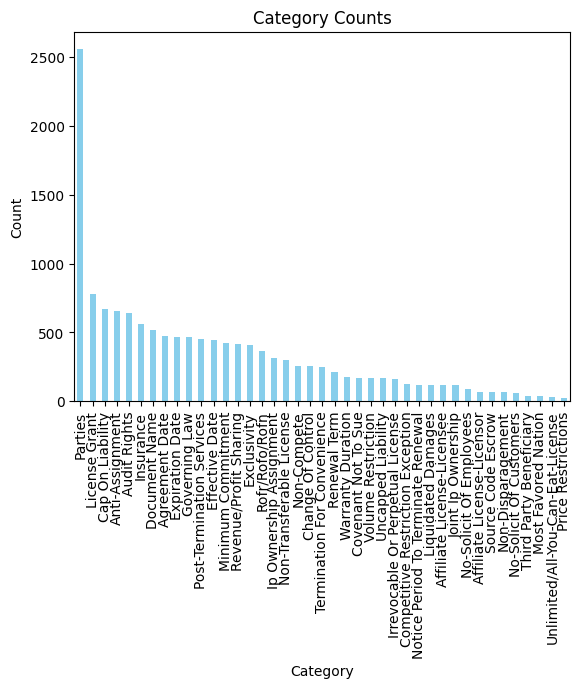

In [17]:
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()